# Project 3 - Tanzania Water Wells
_________________________________________________________

## Business Understanding
This notebook is a categorical study of water wells in Tanzania for a non-profit organization to determine which wells need maintenance or are defunct and require new wells entirely. The goal of this project is to predict with as much accuracy as possible which water wells in the Republic of Tanzania require maintenence or new waterwells built. 

### Data Overview
Data was congregated by [Driven Data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) from [Taarifa](https://taarifa.org/) and the Republic of Tanzania's [Ministry of Water](https://www.maji.go.tz/) for the purpose of predicting which water wells are faulty. Predictions will be made based of data regarding the type of pumps, time since it was installed and how it has been managed since. The main goal of this project is to provide suggestions to a nonprofit to fund maintanence on pumps that could fail to save the cost of building new wells as a result of defunct water wells to continue to provide vital, potable clean water to the local populace.

## Data Preparation
Data Cleaning and Preparation
Some categories of data have mispelled data values, and decided how to best deal with missing data explored through graphs, grouping, and descriptive statistics. \
\
The purpose of this Data preparation is to prepare the data for further modeling.

In [2]:
#Imported necessary libraries for data cleaning
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split

In [3]:
#Loaded in data sets and set to dataframes
df_test_set = pd.read_csv('data/test-set-values.csv')
df_train_set = pd.read_csv('data/training-test-values.csv')
df_train_labels = pd.read_csv('data/training-set-labels.csv')

In [4]:
df_test_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [5]:
df_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [6]:
df_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


After a cursory look at the data we will leave the test data for now and combine the test data set and label on the shared id column

In [7]:
df = pd.merge(df_train_set, df_train_labels, how='inner', on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [8]:
df.head(25)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

There are 40 different columns of data outside of the index ID, some of which appear to be reductive and can be dropped after further exploration. There are also 59400 rows of data. We will next check for missing data and decide how to best deal with it

In [10]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [11]:
# Checking basic statistics for all numerical columns, many such as region or district code or more
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


After checking the different categories and their data types, the most useful categories appear to be construction_year, management_group, water_quality, installer, and status_group. These categories were also emphasized in the competition as those
most helpful. We'll also take a look at population, region and district codes. 

In [12]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

There are a surprising amount of non functional water wells. This is our target variable to predict whether a well falls into one of these three categories based off the aformentioned variables. 

We will start by looking at water sources. Quantity and quantity group columns are the exact same so we will drop quantity group column cause it's longer to type out. 

In [13]:
print(df['quantity'].value_counts())

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


In [14]:
print(df['quantity_group'].value_counts())

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


In [15]:
df.drop(columns='quantity_group')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [16]:
print(df['source'].value_counts())
print(df['source_type'].value_counts())
print(df['source_class'].value_counts())

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


All three sources are pretty similar, with each column getting more general. The main difference between source and source type is it combines machine dbh and hand dtw under a single value of borehole as well as combining lakes and rivers. We'll use source_type as it is a nice middle ground between the three columns.  

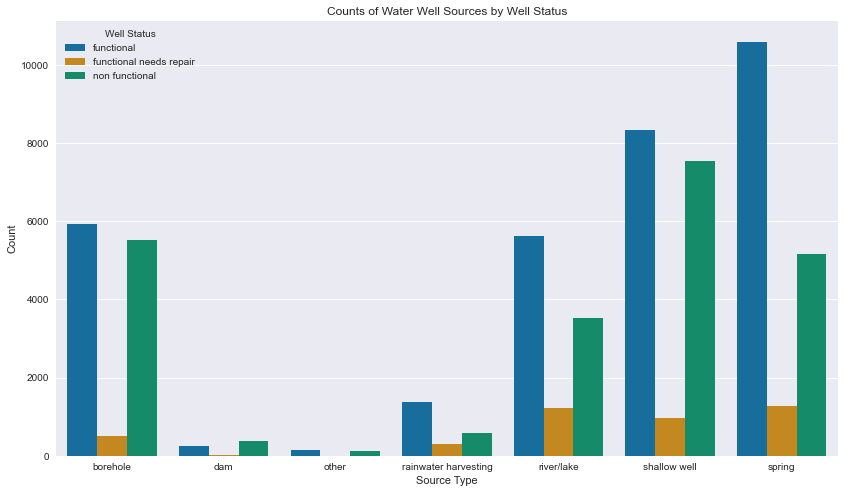

In [17]:
grouped_data = df.groupby(['source_type', 'status_group']).size().reset_index(name='count')

plt.figure(figsize=(14,8))

sns.barplot(data=grouped_data, x='source_type', y='count', hue='status_group', palette='colorblind')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.title('Counts of Water Well Sources by Well Status')
plt.legend(title='Well Status', loc='upper left')
plt.show()

After visualizing source types it appears that springs, rainwater harvesting and river/lake all produce more functional water wells while dams, and boreholes are less reliable. 

### Data Cleaning: Population

<Figure size 1440x576 with 0 Axes>

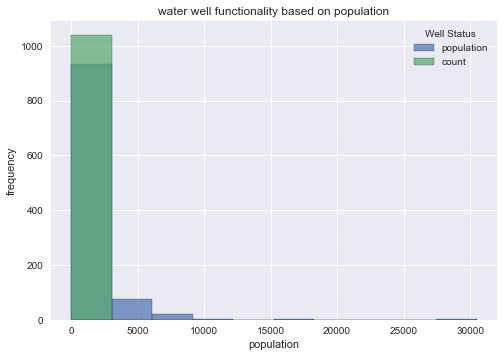

In [18]:
df_population = df.groupby(['population', 'status_group']).size().reset_index(name='count')
df_filtered_population = df_population[df_population['population'] > 400]
plt.figure(figsize=(20,8))

df_filtered_population.plot.hist(bins = 10, edgecolor='black', alpha = 0.7)
plt.xlabel('population')
plt.ylabel('frequency')
plt.title('water well functionality based on population')
plt.legend(title='Well Status', loc='upper right')
plt.show()

In [19]:
df_population_filtered = df[df['population'] < 5]
df_population_filtered.shape[0]

28427

In [20]:
28427/59400

0.4785690235690236

In [21]:
df_population_filtered_1 = df[df['population'].isin([0,1])]
count_instances = df_population_filtered_1.shape[0]
print(f'Counts of instances where the population is 1 or 0: {count_instances}')
print(f'Percentage where the population is 1 or 0: {count_instances/59400 * 100:.2f}%')

Counts of instances where the population is 1 or 0: 28406
Percentage where the population is 1 or 0: 47.82%


Nearly half of our population data is either a value of 0 or 1. There are a couple ways we could approach this, normally we would fill in missing data with 
the mean or median depending on our knowledge of the domain, however, with it being such a large portion of the data we will drop the column as it is not that helpful overall.

### Data Cleaning: Region
Using Region column and dropping both region_code and district_code as region has more information overall

In [22]:
print(df['region'].isna().count())
print('region column has no missing data')
print(df['region'].value_counts())

59400
region column has no missing data
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64


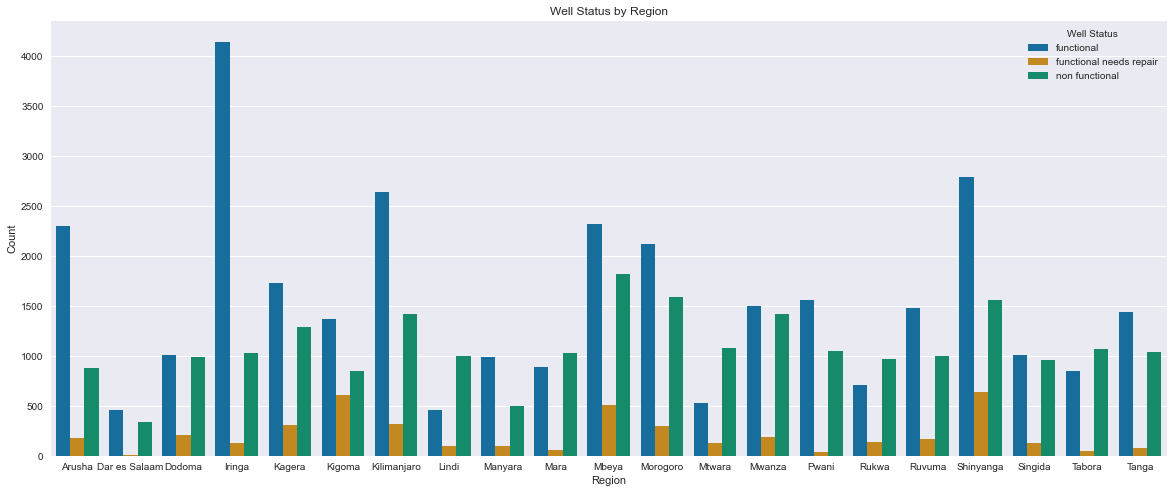

In [23]:
df_region = df.groupby(['region', 'status_group']).size().reset_index(name='count')

plt.figure(figsize=(20,8))

sns.barplot(data=df_region, x='region', y='count', hue='status_group', palette='colorblind')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Well Status by Region')
plt.legend(title='Well Status', loc='upper right')
plt.show()

### Data Cleaning: Pump Types

In [24]:
print(df['extraction_type'].value_counts())
print('________________________')
print(df['extraction_type_group'].value_counts())
print('________________________')
print(df['extraction_type_class'].value_counts())
print('________________________')

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64
________________________
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mar

In [25]:
df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).count()

id  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26780   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2400   
                      india mark iii        india mark iii                98   
                      nira/tanira           nira/tanira                 8154   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3670   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6430   
rope pump             rope pump             other - rope pump            451   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                       amount_tsh  \
extraction_type_class extraction_type_group extraction_type                         
gravity               gravity               gravity                         26780   
handpump              afridev               afridev                          1770   
                      india mark ii         india mark ii                    2400   
                      india mark iii        india mark iii                     98   
                      nira/tanira           nira/tanira                      8154   
                      other handpump        other - mkulima/shinyanga           2   
                                            other - play pump                  85   
                                            other - swn 81                    229   
                                            walimi                             48   
                      swn 80                swn 80                           3670   
motorpump             mono                  mono                             2865   
                      other motorpump       cemo                               90   
                                            climax                             32   
other                 other                 other                            6430   
rope pump             rope pump             other - rope pump                 451   
submersible           submersible           ksb                              1415   
                                            submersible                      4764   
wind-powered          wind-powered          windmill                          117   

                                                                       date_recorded  \
extraction_type_class extraction_type_group extraction_type                            
gravity               gravity               gravity                            26780   
handpump              afridev               afridev                             1770   
                      india mark ii         india mark ii                       2400   
                      india mark iii        india mark iii                        98   
                      nira/tanira           nira/tanira                         8154   
                      other handpump        other - mkulima/shinyanga              2   
                                            other - play pump       

Similar reasoning to the source types we will be using the extraction_type_group as it is a nice middle ground between the three. 

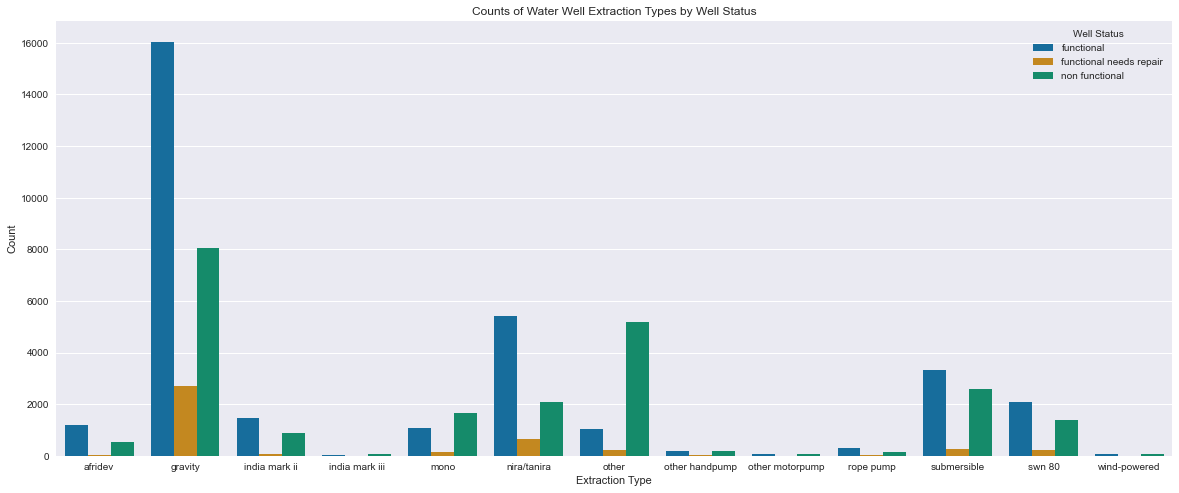

In [26]:
grouped_extraction_data = df.groupby(['extraction_type_group', 'status_group']).size().reset_index(name='count')

plt.figure(figsize=(20,8))

sns.barplot(data=grouped_extraction_data, x='extraction_type_group', y='count', hue='status_group', palette='colorblind')
plt.xlabel('Extraction Type')
plt.ylabel('Count')
plt.title('Counts of Water Well Extraction Types by Well Status')
plt.legend(title='Well Status', loc='upper right')
plt.show()

### Data Cleaning: Construction Information - Installer/Construction Year

In [27]:
print(df['construction_year'].value_counts())

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64


To make the construction data easier to interpret created new column for which decade each was built. Since the vast majority of wells were built in the 2000's we could use it to fill in our missing data but we'll leave it alone for now. 

In [28]:
df['construction_decade'] = (df['construction_year']//10) * 10
df['construction_decade'].value_counts()

0       20709
2000    15330
1990     7678
1980     5578
2010     5161
1970     4406
1960      538
Name: construction_decade, dtype: int64

In [29]:
print(df['construction_decade'].mean())
print(df['construction_decade'].median())

1297.8378787878787
1980.0


In [30]:
#We will be replacing our missing data with the mode, as the mean
#and median is too heavily scewed. 
df['construction_decade'] = df['construction_decade'].replace(0,2000)
df['construction_decade'].value_counts()

2000    36039
1990     7678
1980     5578
2010     5161
1970     4406
1960      538
Name: construction_decade, dtype: int64

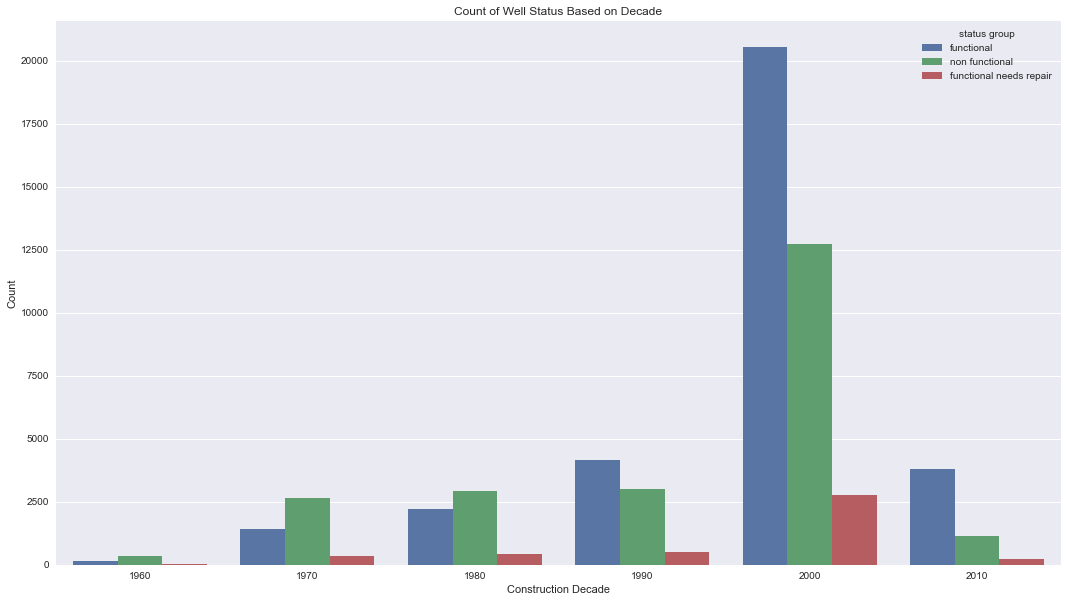

In [31]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='construction_decade', hue='status_group', data=df)
plt.title('Count of Well Status Based on Decade')
plt.xlabel('Construction Decade')
plt.ylabel('Count')
plt.legend(title='status group')

It does appear just from the graph that the older the well the greater liklihood it is non-functioning. Which logically seems to make sense. 

In [32]:
df['installer'].describe()

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object

In [33]:
df['installer'].value_counts().head(100).sum()

43663

In [34]:
df_installer = df['installer']
with pd.option_context('display.max_rows', 100):
    print(df['installer'].value_counts().head(100))

DWE                              17402
Government                        1825
RWE                               1206
Commu                             1060
DANIDA                            1050
KKKT                               898
Hesawa                             840
0                                  777
TCRS                               707
Central government                 622
CES                                610
Community                          553
DANID                              552
District Council                   551
HESAWA                             539
World vision                       408
LGA                                408
WEDECO                             397
TASAF                              396
District council                   392
Gover                              383
AMREF                              329
TWESA                              316
WU                                 301
Dmdd                               287
ACRA                     

There are several values that are the same thing but written slightly differently such as, Government, Central government, Central govt, Gover etc. Combining like categories. Renamed 0 and combined with unknown installers, leaving as their own column as the installer being unknown is a factor rather than filling in or removing the missing data. 

In [35]:
# combined like 
replacement_dict = {
    'DWE': ['District water department', 'District water depar', 'Distric Water Department', 'District council', 'Distri', 'DW'],
    'Government': ['Central government', 'Central govt', 'Centr', 'Central Government', 'Gover', 'Gove', 'GOVER', 'Go', 'GOVERNMENT'],
    'Community': ['Commu', 'Community'],
    'DANIDA': ['DANIDA', 'DANID'],
    'RC Church': ['RC', 'RC CHURCH'],
    'Hesawa': ['HESAWA', 'Hesawa'],
    'World vision': ['World vision', 'World Vision', 'World'],
    'Unicef': ['UNICEF', 'Unisef'],
    'Jaica': ['JAICA', 'Jaica', 'JICA'],
    'Fini Water': ['FinW', 'Fini water', 'FINI WATER'],
    'villagers': ['Villagers', 'Village Council'],
    'AMREF': ['AMREF', 'Amref'],
    'OXFAM': ['OXFAM', 'OXFARM'],
    'Norad': ['NORAD', 'Norad'],
    'DMDD': ['Dmdd', 'DMDD'],
    'TCRS': ['TCRS'],
    'WEDECO': ['WEDECO'],
    'TASAF': ['TASAF'],
    'ACRA': ['ACRA'],
    'TWESA': ['TWESA'],
    'Sengerema Water Department': ['Sengerema Water Department'],
    'Kiliwater': ['Kiliwater'],
    'RWSSP': ['RWSSP'],
    'SHIPO': ['SHIPO', 'Shipo'],
    'Consulting Engineer': ['Consulting Engineer'],
    'Mission': ['Mission', 'Missi'],
    'WVT': ['WVT'],
    'Roman Catholic Church': ['Roman'],
    'Anglican Church': ['Angli'],
    'VWC': ['VWC'],
    'AICT': ['AICT'],
    'MDRDP': ['MDRDP'],
    'Private': ['Private'],
    'World Bank': ['World Bank'],
    'WATER AID': ['WATER AID'],
    'Handeni Trunk Main': ['Handeni Trunk Main('],
    'Halmashauri ya wilaya sikonge': ['Halmashauri ya wilaya sikonge'],
    'Wizara ya maji': ['Wizara ya maji'],
    'MUWSA': ['MUWSA'],
    'DED': ['DED'],
    'Idara ya maji': ['Idara ya maji'],
    'FW': ['FW'],
    'DH': ['DH'],
    'Da': ['Da'],
    'Is': ['Is'],
    'Ir': ['Ir'],
    'HE': ['HE'],
    'H': ['H'],
    'Ki': ['Ki'],
    'Go': ['Go'],
    'wananchi': ['wananchi'],
    'Artisan': ['Artisan'],
    'Kuwait': ['Kuwait'],
    'Tardo': ['Tardo'],
    'ISF': ['ISF'],
    'DDCA': ['DDCA'],
    'HSW': ['HSW'],
    'MWE': ['MWE'],
    'LGA': ['LGA'],
    'WU': ['WU'],
    'SEMA': ['SEMA'],
    'DWSP': ['DWSP', 'DW'],
    'Lawatefuka water sup': ['Lawatefuka water sup'],
    'Magadini-Makiwaru wa': ['Magadini-Makiwaru wa'],
    'Unknown': ['0', 'NaN', '-']
}
for corrected, original in replacement_dict.items():
    df['installer'].replace(to_replace=original, value=corrected, inplace=True)
    
with pd.option_context('display.max_rows', 100):
    print(df['installer'].value_counts())

DWE                           18357
Government                     3753
Community                      1613
DANIDA                         1602
Hesawa                         1379
                              ...  
Nyamwanji                         1
Friend from UN                    1
Ilwilo community                  1
International Aid Services        1
ambwene mwaikeke                  1
Name: installer, Length: 2104, dtype: int64


In [36]:
df['installer'].value_counts()

DWE                           18357
Government                     3753
Community                      1613
DANIDA                         1602
Hesawa                         1379
                              ...  
Nyamwanji                         1
Friend from UN                    1
Ilwilo community                  1
International Aid Services        1
ambwene mwaikeke                  1
Name: installer, Length: 2104, dtype: int64

In [37]:
for corrected, original in replacement_dict.items():
    df_installer.replace(to_replace=original, value=corrected, inplace=True)

In [38]:
df_installer.value_counts().head(20).sum()

35605

In [39]:
print(df_installer.value_counts().head(20))

DWE                 18357
Government           3753
Community            1613
DANIDA               1602
Hesawa               1379
RWE                  1206
KKKT                  898
World vision          799
Unknown               783
TCRS                  707
CES                   610
Fini Water            593
District Council      551
AMREF                 443
LGA                   408
WEDECO                397
TASAF                 396
DMDD                  376
RC Church             374
Norad                 360
Name: installer, dtype: int64


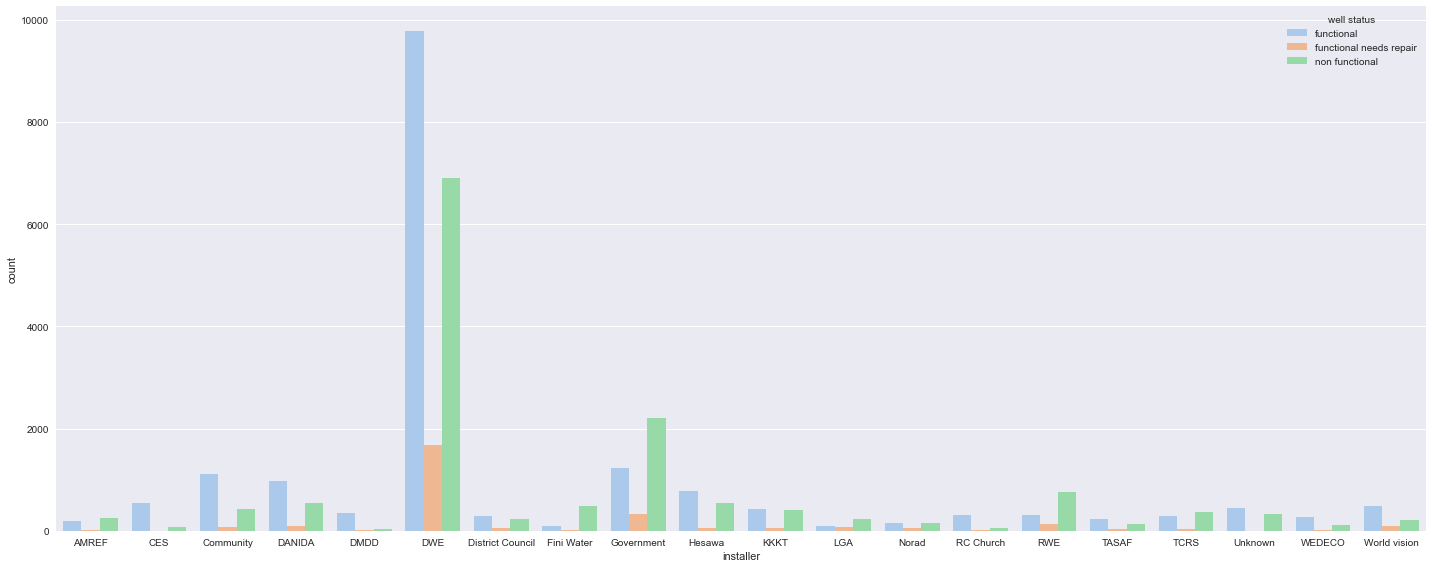

In [40]:
top_20_installers = df_installer.value_counts().head(20).index
filtered_df = df[df['installer'].isin(top_20_installers)]
grouped_data = filtered_df.groupby(['installer', 'status_group']).size().reset_index(name='count')
plt.figure(figsize=(20,8))
sns.barplot(data=grouped_data, x='installer', y='count', hue='status_group', palette='pastel')
plt.xlabel('installer')
plt.ylabel('count')
plt.legend(title='well status', loc='upper right')
plt.tight_layout()
plt.show()

In [41]:
top_20_installers

Index(['DWE', 'Government', 'Community', 'DANIDA', 'Hesawa', 'RWE', 'KKKT',
       'World vision', 'Unknown', 'TCRS', 'CES', 'Fini Water',
       'District Council', 'AMREF', 'LGA', 'WEDECO', 'TASAF', 'DMDD',
       'RC Church', 'Norad'],
      dtype='object')

In [42]:
df_top_installers = top_20_installers

From the bargraph above we can see that the majority of wells installed by the District Water Engineer(DWE), now called District Managers as of 2019 according to the [Tanzania Institutional Framework For Water Supply](https://www.globalwaters.org/sites/default/files/7dec_tanzania_institutional-frameworksforwatersupply.pdf), are functional whereas the majority of wells installed by other sources such as Fini Water, the Government, or RWE are no longer functional

In [43]:
#Before starting modeling, going to normalize construction decade for better clarity and make status_group a bivariable target
df['construction_decade'] = (df['construction_decade'] - df['construction_decade'].min()) / (df['construction_decade'].max() - df['construction_decade'].min())
df['status_group'] = df['status_group'].replace({'functional needs repair': 'functional'})

print(df['construction_decade'].value_counts())
print(df['status_group'].value_counts())

0.8    36039
0.6     7678
0.4     5578
1.0     5161
0.2     4406
0.0      538
Name: construction_decade, dtype: int64
functional        36576
non functional    22824
Name: status_group, dtype: int64


# Modeling

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
ohe = OneHotEncoder(handle_unknown='ignore')

In [45]:
y=df['status_group']
X=df.drop('status_group', axis=1)

In [46]:
X.fillna({'installer':'Unknown', 'extraction_type_group': 'other'}, inplace=True)

In [47]:
#Subset with categories we will use as features
features = ['extraction_type_group', 'quantity', 'source_type', 'installer', 'region', 'construction_decade']
X = X[features]
X.isna().sum()

extraction_type_group    0
quantity                 0
source_type              0
installer                0
region                   0
construction_decade      0
dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
#Converting category types to floats and getting dummy variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True, dtype=float)
X_test_encoded = pd.get_dummies(X_test, drop_first=True, dtype=float)

Our target feature is also an object data type and has 3 different values it could be. We will be combined functional and functional needs repair to make our target variable binary instead of a tertiary target point.

In [50]:
y_train_encoded = pd.get_dummies(y_train, drop_first=True, dtype=float)
y_test_encoded = pd.get_dummies(y_test, drop_first=True, dtype=float)

In [51]:
y_train_encoded

,non functional
8398,0.0
48513,0.0
50670,0.0
31896,1.0
19998,1.0
...,...
45891,0.0
52416,0.0
42613,0.0
43567,1.0


In [52]:
y_train_encoded = y_train_encoded.values.flatten()
y_test_encoded = y_test_encoded.values.flatten()

In [53]:
# Combine the training and test sets together to apply get_dummies to both
X_combined = pd.concat([X_train, X_test], axis=0)

# Apply one-hot encoding (get_dummies) to the combined data
X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)

# Split the combined data back into train and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X_train), :]
X_test_encoded = X_combined_encoded.iloc[len(X_train):, :]

In [54]:
logreg = LogisticRegression(max_iter=1000)

In [55]:
logreg.fit(X_train_encoded, y_train_encoded)
 
y_test_pred = logreg.predict(X_test_encoded)

y_test_pred

roc_auc = roc_auc_score(y_test_encoded, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_pred)
cf = confusion_matrix(y_test_encoded, y_test_pred)

print(cf)
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'Accuracy Score: ', accuracy_score(y_test_encoded, y_test_pred))

[[8386  747]
 [2339 3378]]
ROC AUC Score: 0.7545
Accuracy Score:  0.7921885521885522


Our ROC AUC Score: is 0.7545 which means there is a 75.45% chance that our regression model correctly identifies 

Train AUC: 0.8519247772008774
Test AUC: 0.8403741716607747


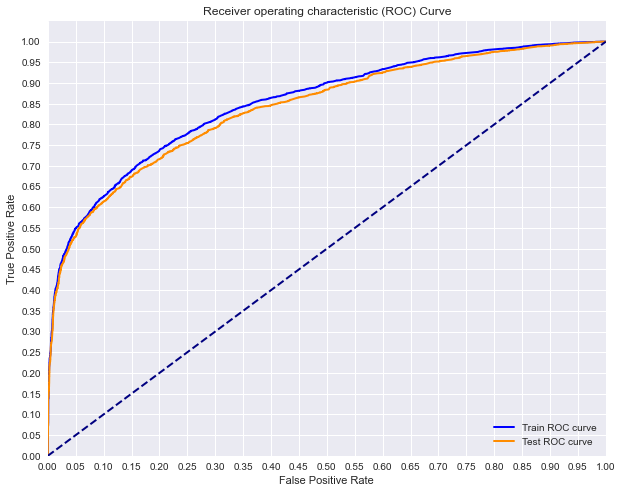

In [56]:
y_train_score = logreg.decision_function(X_train_encoded)
y_test_score = logreg.decision_function(X_test_encoded)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train_encoded, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_encoded, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Further Modeling: DecisionTrees

In [57]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(criterion='entropy')

In [58]:
importances = clf.feature_importances_

In [59]:
y_preds = clf.predict(X_test_encoded)
roc_auc = roc_auc_score(y_test_encoded, y_preds)

print(f'ROC AUC Score: {roc_auc:.4f}')
print('Accuracy: ', accuracy_score(y_test_encoded, y_preds))

ROC AUC Score: 0.7909
Accuracy:  0.8186531986531986


The Decision Tree model performs marginally better but we will check to see one more very similar model A Random Forest Classifier to see if we can improve on that further to reduce overfitting and improve accuracy. 

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train_encoded)
y_pred_rf = rf_model.predict(X_test_encoded)

In [61]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Accuracy: ', accuracy_score(y_test_encoded, y_pred_rf))

ROC AUC Score: 0.7960
Accuracy:  0.8214814814814815


### Further Modeling: Changing Hyperparameters
The previous models we have run have been "vanilla" so now we are going to make some changes to the hyperparameters for easier computation and hopefully reduce the chances of overfitting further. We will do this on the DecisionTreeClassifier to see if we can get similar results with less computational power compared to the RandomForestClassifier

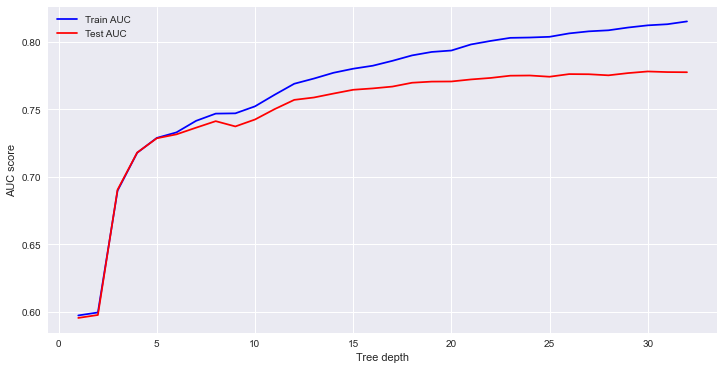

In [62]:
# Identifying the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train_encoded, y_train_encoded)
    train_pred = dt.predict(X_train_encoded)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_encoded, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_encoded)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

* From the graph above the training error decreases the further the depth which is a clear sign of overfitting.
* After a depth of 5 there training and test AUC scores start differing, also a clear sign of overfitting.
* Optimal depth here is clearly 5. 

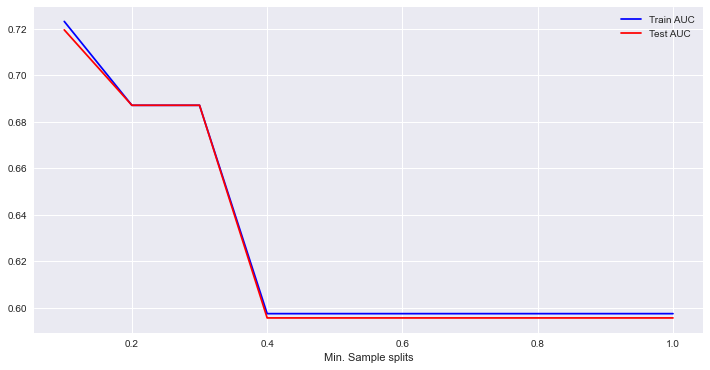

In [63]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train_encoded, y_train_encoded)
    train_pred = dt.predict(X_train_encoded)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train_encoded, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_encoded)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

When we alter the min_sample_splits we see that they level off first at .2 then lose more accuracy and level off at 0.4, anything above this value does nothing to improve learning

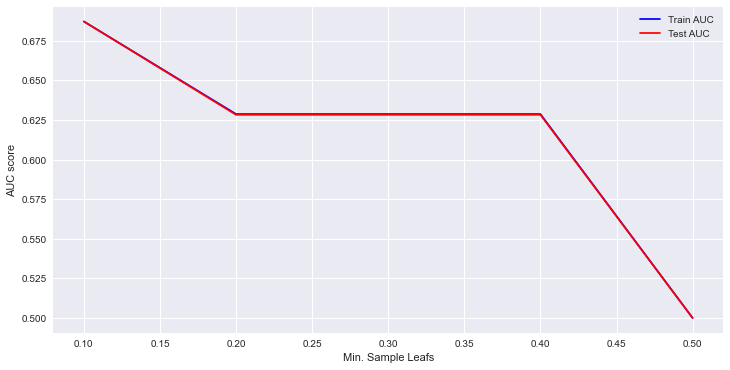

In [64]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train_encoded, y_train_encoded)
    train_pred = dt.predict(X_train_encoded)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_encoded, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_encoded)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

Since there is little difference between our training and test AUC scores when changing the hyperparameters of both min sample leafs and min sample splits, we will run our model with a max_depth of five and leave off the other hyperparameters. 

In [66]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt.fit(X_train_encoded, y_train_encoded)
train_pred = dt.predict(X_train_encoded)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_encoded, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
train_results.append(roc_auc)
y_pred = dt.predict(X_test_encoded)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'ROC AUC Score: {roc_auc: .4f}')
print('Accuracy Score: ', accuracy_score(y_test_encoded, y_pred))

ROC AUC Score:  0.7286
Accuracy Score:  0.7779124579124579


This model is more resistent to overfitting and therefore more useful overall for data not in our training dataset, is less computationally intensive and will predict whether a waterwell will be functional or not funcational in The Republic of Tanzania 73% of the time. 

# Recommendations

* Wells installed by District Water Engineers (DWE) are more likely to be functioning over those installed by the Government or by Fini Water, use DWE for new well development focused in Tabora, Dodoma, Mara, Rukwa, and Lindi regions first
* Focus repair efforts on wells older than 2000 as they are more likely to be in disrepair
* Where new wells need to be created focus on natural resources such as springs, rivers and lakes. Sources such as boreholes or dams are much more likely to be nonfunctional.

<b>Overall Business Strategy<b>:
The non-profit organization should optimize resource allocation by focusing on high-risk wells (e.g., certain installers, older wells, and less reliable water sources) while ensuring that resources are effectively spread across the whole region. Combining data-driven decision-making with targeted maintenance strategies will reduce costs associated with building new wells and increase the operational lifespan of existing water wells, ultimately benefiting the local population with a sustainable water supply.